# 接触物体标记
在处理荧光显微镜图像时，我们经常遇到应该区分开的相互粘连的物体。然而，如果我们在阈值处理后应用连通分量标记，我们会得到一个标记的物体，而我们认为应该有两个。ImageJ用户通常会使用"分水岭"算法，该算法能够根据物体的形状判断是否包含两个物体，并进行分割。SimpleITK中的一些函数允许我们做同样的事情。为了编程方便，我们再次使用可编写脚本的napari插件[napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing)。

In [1]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
from napari_simpleitk_image_processing import threshold_otsu, touching_objects_labeling, gaussian_blur

我们的起点是一个包含一些8字形物体的二值图像，我们想要将这些物体分割开。

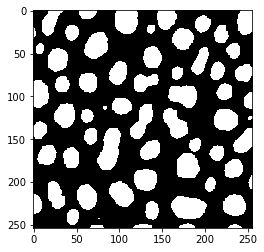

In [2]:
blobs = imread('../../data/blobs.tif')
binary = threshold_otsu(blobs)
imshow(binary)

`touching_objects_labeling`函数接受一个二值图像作为输入，并产生一个标签图像，就像连通分量标记一样。但结果有所不同：8字形物体被分割开了。

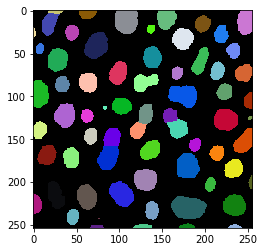

In [3]:
touching_labels = touching_objects_labeling(binary)
imshow(touching_labels, labels=True)

## 微调结果
如果不应该分割所有物体，可以通过在将二值图像传递给`touching_objects_labeling`之前修改它来微调这个过程的结果。例如，如果我们在对图像进行阈值处理之前应用高斯模糊滤波器，我们可以得到一个较少物体被分割的标签图像。

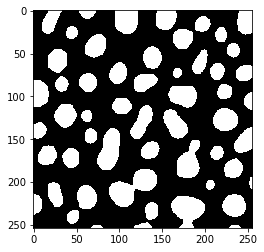

In [4]:
blurred = gaussian_blur(blobs, variance_x=25, variance_y=25)

binary2 = threshold_otsu(blurred)
imshow(binary2)

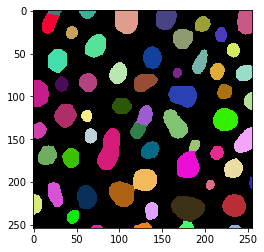

In [5]:
touching_labels = touching_objects_labeling(binary2)
imshow(touching_labels, labels=True)